In [1]:
# filesRIC = [
#     "Attacks/Syn Flood/SYN1.csv",
#     "Attacks/Syn Flood/SYN2.csv",
#     "Attacks/Syn Flood/SYN3.csv",
#     "Attacks/Syn Flood/DDOS_SYN1.csv",
#     "Attacks/Syn Flood/DDOS_SYN2.csv",
#     "Attacks/Syn Flood/DDOS_SYN3.csv",
#     "Attacks/UDP Flood/UDP1.csv",
#     "Attacks/UDP Flood/UDP2.csv",
#     "Attacks/UDP Flood/UDP3.csv",
#     "Attacks/UDP Flood/UDP4.csv",
#     "Attacks/UDP Flood/UDP5.csv",
#     "Attacks/UDP Flood/DDOS_UDP1.csv",
#     "Attacks/UDP Flood/DDOS_UDP2.csv",
#     "Attacks/UDP Flood/DDOS_UDP3.csv",
#     "Attacks/Port Scans/PortScan1.csv",
#     "Attacks/Port Scans/PortScan2.csv",
#     "Attacks/Port Scans/PortScan3.csv",
#     "Attacks/ICMP Flood/ICMP1.csv",
#     "Attacks/ICMP Flood/ICMP2.csv",
#     "Attacks/ICMP Flood/ICMP3.csv",
#     "Attacks/ICMP Flood/DDOS_ICMP1.csv",
#     "Attacks/ICMP Flood/DDOS_ICMP2.csv",
#     "Attacks/ICMP Flood/DDOS_ICMP3.csv",
#     "Attacks/TCP Flood/TCP1.csv",
#     "Attacks/TCP Flood/TCP2.csv",
#     "Attacks/TCP Flood/TCP3.csv",
#     "Attacks/TCP Flood/DDOS_TCP1.csv",
#     "Attacks/TCP Flood/DDOS_TCP2.csv",
#     "Attacks/TCP Flood/DDOS_TCP3.csv",
#     "Attacks/Benign Traffic/Benign1.csv",
#     "Attacks/Benign Traffic/Benign2.csv",
#     "Attacks/Benign Traffic/Benign3.csv",
#     "Attacks/Benign Traffic/Benign4.csv",
#     "Attacks/Benign Traffic/Benign5.csv",
#     "Attacks/Benign Traffic/Benign6.csv"
# ]

# db_server = '5G-NL-IDD_Server_Data.db'
# table_name_server = 'Server_Data'

# conn = sqlite3.connect(db_server)

# conn.execute(f'''
# CREATE TABLE IF NOT EXISTS {table_name_server} (
#     id INTEGER PRIMARY KEY AUTOINCREMENT,
#     cellid INTEGER,
#     cqi INTEGER,
#     dlBler REAL,
#     dlBytes REAL,
#     dlMcs INTEGER,
#     in_sync INTEGER,
#     pcmax INTEGER,
#     phr INTEGER,
#     pmi TEXT,
#     pucchSnr INTEGER,
#     puschSnr REAL,
#     ri INTEGER,
#     rnti TEXT,
#     rsrp REAL,
#     rsrq REAL,
#     rssi REAL,
#     sinr REAL,
#     timestamp REAL,
#     ue_id INTEGER,
#     ulBler REAL,
#     ulBytes REAL,
#     ulMcs INTEGER,
#     traffic_label TEXT,
#     traffic_type TEXT
# )
# ''')

# for file in filesRIC:

#     print(f" Extracting from {file}...")
#     df = pd.read_csv(file)

#     if 'syn' in file.lower():
#         traffic_label = 'SYN'
#     elif 'tcp' in file.lower():
#         traffic_label = 'TCP'
#     elif 'udp' in file.lower():
#         traffic_label = 'UDP'
#     elif 'icmp' in file.lower():
#         traffic_label = 'ICMP'
#     elif 'portscan' in file.lower():
#         traffic_label = 'PortScan'
#     elif 'benign' in file.lower():
#         traffic_label = 'Benign'
#     else:
#         traffic_label = 'Unknown'

#     df['traffic_label'] = traffic_label
    
    
#     if 'benign' in file.lower():
#         traffic_type = 'Benign'
#     else:
#         traffic_type = 'Attack'
    
    
#     df['traffic_type'] = traffic_type
    
#     df.to_sql(table_name_server, conn, if_exists='append', index=False)


# conn.commit()
# conn.close()


In [2]:
import subprocess
import pandas as pd
import sqlite3
import os

In [3]:
conn = sqlite3.connect('data/5G-NL-IDD_Radio_Telemetry.db')
df = pd.read_sql_query("SELECT * FROM Server_Data LIMIT 30000", conn)

In [4]:
df.head()

,id,cellid,cqi,dlBler,dlBytes,dlMcs,in_sync,pcmax,phr,pmi,...,rsrq,rssi,sinr,timestamp,ue_id,ulBler,ulBytes,ulMcs,traffic_label,traffic_type
0,1,11111111,15,0.089478,191025828.0,19,1,23,20,"(0,0)",...,-11.0,-71.5,15.0,1.741274e+12,3,0.063096,401559953.0,12,SYN,Attack
1,2,11111111,15,0.092735,191003809.0,15,1,24,20,"(0,0)",...,-11.0,-71.5,14.5,1.741274e+12,3,0.044686,400332288.0,10,SYN,Attack
2,3,11111111,15,0.128255,190982587.0,19,1,24,20,"(0,0)",...,-11.0,-71.5,14.5,1.741274e+12,3,0.107673,399403353.0,7,SYN,Attack
3,4,11111111,15,0.088818,190959542.0,16,1,23,20,"(0,0)",...,-11.0,-70.4,14.5,1.741274e+12,3,0.169917,398417406.0,13,SYN,Attack
4,5,11111111,15,0.077579,190936603.0,19,1,24,20,"(0,0)",...,-11.0,-71.0,15.0,1.741274e+12,3,0.040483,397321447.0,9,SYN,Attack


In [5]:
count_df = pd.read_sql_query("SELECT COUNT(*) as total FROM Server_Data", conn)
print(count_df)
conn.close()

   total
0   7237


Pre-Processing

In [26]:

# conn = sqlite3.connect('5G-NL-IDD_Server_Data.db')

# df = pd.read_sql_query("SELECT * FROM Server_Data", conn)

# conn.close()

In [27]:
df['traffic_type'] = df['traffic_type'].map({'Benign': 0, 'Attack': 1})

df.isnull().sum()

id               0
cellid           0
cqi              0
dlBler           0
dlBytes          0
dlMcs            0
in_sync          0
pcmax            0
phr              0
pmi              0
pucchSnr         0
puschSnr         0
ri               0
rnti             0
rsrp             0
rsrq             0
rssi             0
sinr             0
timestamp        0
ue_id            0
ulBler           0
ulBytes          0
ulMcs            0
traffic_label    0
traffic_type     0
dtype: int64

In [28]:
df.nunique()

id               7237
cellid              2
cqi                 8
dlBler           4274
dlBytes          7119
dlMcs              26
in_sync             1
pcmax               4
phr                44
pmi                19
pucchSnr           33
puschSnr           75
ri                  2
rnti               44
rsrp               38
rsrq               17
rssi              189
sinr               60
timestamp        4761
ue_id              21
ulBler           6806
ulBytes          7112
ulMcs              26
traffic_label       6
traffic_type        2
dtype: int64

In [29]:
df = df.drop('id', axis=1)
df = df.drop('cellid', axis=1)
df = df.drop('in_sync', axis=1)
df = df.drop('timestamp', axis=1)
df = df.drop('ue_id', axis=1)
df = df.drop('traffic_label', axis=1)

In [30]:
df.head()

,cqi,dlBler,dlBytes,dlMcs,pcmax,phr,pmi,pucchSnr,puschSnr,ri,rnti,rsrp,rsrq,rssi,sinr,ulBler,ulBytes,ulMcs,traffic_type
0,15,0.089478,191025828.0,19,23,20,"(0,0)",21,17.5,1,90d5,-99.0,-11.0,-71.5,15.0,0.063096,401559953.0,12,1
1,15,0.092735,191003809.0,15,24,20,"(0,0)",16,18.0,1,90d5,-99.0,-11.0,-71.5,14.5,0.044686,400332288.0,10,1
2,15,0.128255,190982587.0,19,24,20,"(0,0)",20,17.5,1,90d5,-99.0,-11.0,-71.5,14.5,0.107673,399403353.0,7,1
3,15,0.088818,190959542.0,16,23,20,"(0,0)",15,17.0,1,90d5,-99.0,-11.0,-70.4,14.5,0.169917,398417406.0,13,1
4,15,0.077579,190936603.0,19,24,20,"(0,0)",19,17.5,1,90d5,-99.0,-11.0,-71.0,15.0,0.040483,397321447.0,9,1


In [31]:
df['traffic_type'].value_counts(normalize=True)

traffic_type
1    0.587951
0    0.412049
Name: proportion, dtype: float64

In [32]:
df['pmi'] = df['pmi'].astype('category').cat.codes
df.head()


,cqi,dlBler,dlBytes,dlMcs,pcmax,phr,pmi,pucchSnr,puschSnr,ri,rnti,rsrp,rsrq,rssi,sinr,ulBler,ulBytes,ulMcs,traffic_type
0,15,0.089478,191025828.0,19,23,20,0,21,17.5,1,90d5,-99.0,-11.0,-71.5,15.0,0.063096,401559953.0,12,1
1,15,0.092735,191003809.0,15,24,20,0,16,18.0,1,90d5,-99.0,-11.0,-71.5,14.5,0.044686,400332288.0,10,1
2,15,0.128255,190982587.0,19,24,20,0,20,17.5,1,90d5,-99.0,-11.0,-71.5,14.5,0.107673,399403353.0,7,1
3,15,0.088818,190959542.0,16,23,20,0,15,17.0,1,90d5,-99.0,-11.0,-70.4,14.5,0.169917,398417406.0,13,1
4,15,0.077579,190936603.0,19,24,20,0,19,17.5,1,90d5,-99.0,-11.0,-71.0,15.0,0.040483,397321447.0,9,1


In [33]:
print(df.describe())

               cqi       dlBler       dlBytes        dlMcs        pcmax  \
count  7237.000000  7237.000000  7.237000e+03  7237.000000  7237.000000   
mean     14.783750     0.039969  6.270583e+08    15.062457    23.638662   
std       0.517062     0.056376  2.510016e+09     6.286549     2.641101   
min       7.000000     0.000000  0.000000e+00     0.000000     0.000000   
25%      15.000000     0.000000  9.086541e+06     9.000000    24.000000   
50%      15.000000     0.006066  8.315205e+07    14.000000    24.000000   
75%      15.000000     0.070106  1.889349e+08    19.000000    24.000000   
max      15.000000     0.885753  1.342306e+10    27.000000    25.000000   

               phr          pmi     pucchSnr     puschSnr           ri  \
count  7237.000000  7237.000000  7237.000000  7237.000000  7237.000000   
mean     31.070609     3.528810    19.629681    20.037516     1.368661   
std      17.050517     5.546343     3.184087     6.650447     0.482475   
min       0.000000     0.000

In [34]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['rnti'] = encoder.fit_transform(df['rnti'])

In [35]:
# df.to_csv('cleaned_radio_telemetry.csv', index=False)

In [ ]:
import pandas as pd
df = pd.read_csv('cleaned_radio_telemetry.csv')

Pearson's Correlation

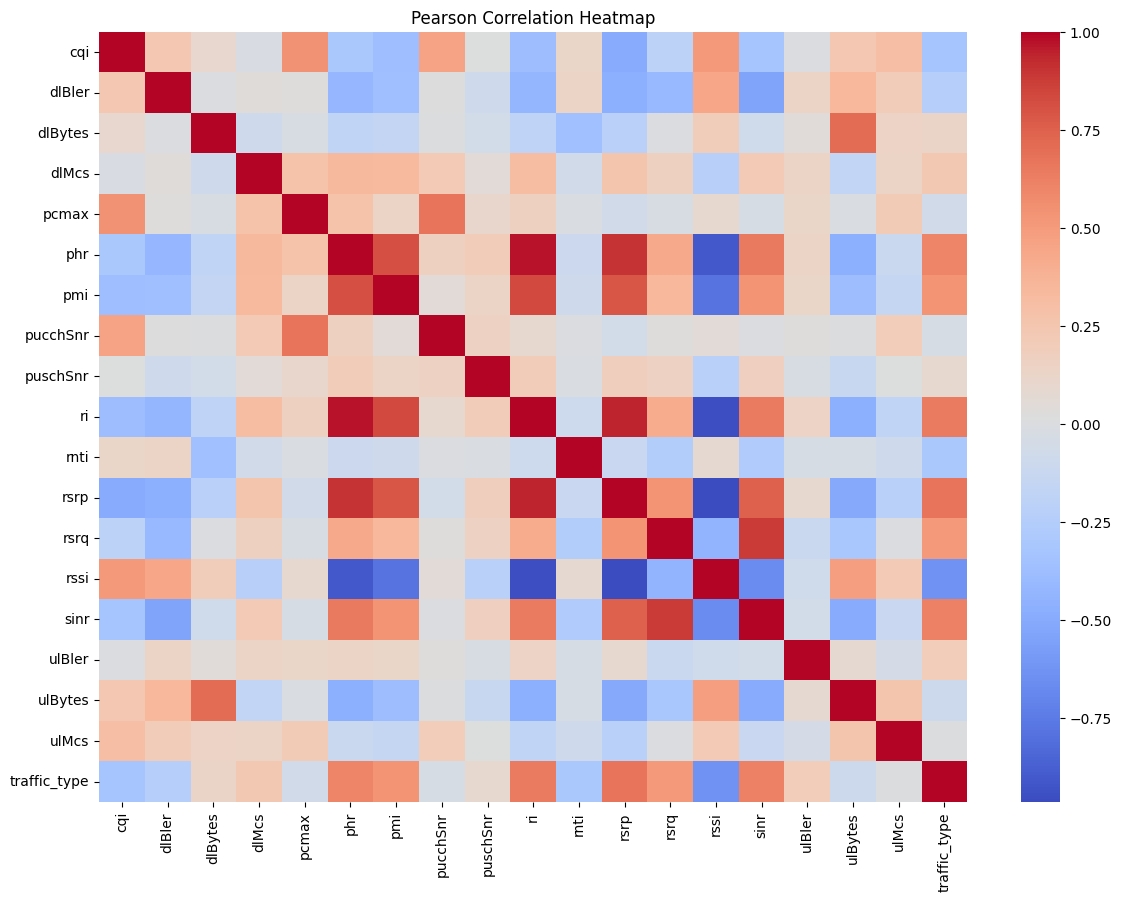

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr(method='pearson')

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title('Pearson Correlation Heatmap')
plt.show()

In [38]:
print(corr_matrix)


                   cqi    dlBler   dlBytes     dlMcs     pcmax       phr  \
cqi           1.000000  0.240343  0.097884 -0.017442  0.543082 -0.297889   
dlBler        0.240343  1.000000 -0.004946  0.034047  0.025696 -0.424162   
dlBytes       0.097884 -0.004946  1.000000 -0.089130 -0.026393 -0.175329   
dlMcs        -0.017442  0.034047 -0.089130  1.000000  0.277832  0.333922   
pcmax         0.543082  0.025696 -0.026393  0.277832  1.000000  0.277348   
phr          -0.297889 -0.424162 -0.175329  0.333922  0.277348  1.000000   
pmi          -0.375560 -0.371090 -0.154754  0.329710  0.139277  0.812172   
pucchSnr      0.458103  0.018941  0.002324  0.218613  0.670729  0.166932   
puschSnr      0.010458 -0.089526 -0.061874  0.055372  0.107808  0.208522   
ri           -0.382262 -0.430252 -0.185933  0.311077  0.166589  0.975541   
rnti          0.121237  0.135291 -0.364929 -0.068210 -0.006427 -0.112259   
rsrp         -0.500650 -0.468013 -0.218053  0.257054 -0.071045  0.900632   
rsrq        

In [39]:
target_corr = corr_matrix['traffic_type'].drop('traffic_type').sort_values(ascending=False)
print(target_corr)

rsrp        0.676575
ri          0.639715
sinr        0.622892
phr         0.606107
pmi         0.532667
rsrq        0.504679
dlMcs       0.239565
ulBler      0.201747
dlBytes     0.131227
puschSnr    0.093883
ulMcs       0.008357
pucchSnr   -0.035736
pcmax      -0.072977
ulBytes    -0.101808
dlBler     -0.238040
rnti       -0.303615
cqi        -0.334941
rssi       -0.641276
Name: traffic_type, dtype: float64


ANOVA F-Score

In [40]:
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=['traffic_type']) 
y = df['traffic_type']

In [41]:
from sklearn.feature_selection import f_classif

f_scores, p_values = f_classif(X, y)

anova_df = pd.DataFrame({
    'Feature': X.columns,
    'F-score': f_scores,
    'p-value': p_values
}).sort_values(by='F-score', ascending=False)

print(anova_df)

     Feature      F-score        p-value
11      rsrp  6107.650697   0.000000e+00
13      rssi  5053.445153   0.000000e+00
9         ri  5011.831951   0.000000e+00
14      sinr  4586.786852   0.000000e+00
5        phr  4201.311084   0.000000e+00
6        pmi  2865.995167   0.000000e+00
12      rsrq  2472.513555   0.000000e+00
0        cqi   914.223410  3.182185e-189
10      rnti   734.657370  3.550257e-154
3      dlMcs   440.506865   5.443763e-95
1     dlBler   434.583070   8.946180e-94
15    ulBler   306.971729   2.416973e-67
2    dlBytes   126.772868   3.637836e-29
16   ulBytes    75.775842   3.889793e-18
8   puschSnr    64.335957   1.214756e-15
4      pcmax    38.737573   5.118433e-10
7   pucchSnr     9.251499   2.361457e-03
17     ulMcs     0.505350   4.771815e-01


Feature Selection (Filter method)

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [43]:
from sklearn.feature_selection import mutual_info_classif

i_scores = mutual_info_classif(X_train,y_train)


features_info_gain = pd.DataFrame(i_scores,index = X_train.columns, columns =['I-Gain'])
features_info_gain.sort_values(by=['I-Gain'],ascending=False,inplace=True)
print(features_info_gain)

            I-Gain
rnti      0.676223
ulBytes   0.441694
dlBytes   0.396949
phr       0.313084
rsrp      0.302797
rssi      0.293619
sinr      0.290838
ri        0.275333
pmi       0.268428
rsrq      0.199868
dlMcs     0.193076
dlBler    0.112324
cqi       0.104892
ulBler    0.100499
ulMcs     0.058409
pucchSnr  0.033123
puschSnr  0.026123
pcmax     0.018056


In [44]:
df = df.drop('pucchSnr', axis=1)
df = df.drop('pcmax', axis=1)
df = df.drop('puschSnr', axis=1)
df = df.drop('ulMcs', axis=1)


In [45]:
df.head()

,cqi,dlBler,dlBytes,dlMcs,phr,pmi,ri,rnti,rsrp,rsrq,rssi,sinr,ulBler,ulBytes,traffic_type
0,15,0.089478,191025828.0,19,20,0,1,21,-99.0,-11.0,-71.5,15.0,0.063096,401559953.0,1
1,15,0.092735,191003809.0,15,20,0,1,21,-99.0,-11.0,-71.5,14.5,0.044686,400332288.0,1
2,15,0.128255,190982587.0,19,20,0,1,21,-99.0,-11.0,-71.5,14.5,0.107673,399403353.0,1
3,15,0.088818,190959542.0,16,20,0,1,21,-99.0,-11.0,-70.4,14.5,0.169917,398417406.0,1
4,15,0.077579,190936603.0,19,20,0,1,21,-99.0,-11.0,-71.0,15.0,0.040483,397321447.0,1


In [6]:
# df.to_csv('after_analysis_radio_telemetry.csv', index=False)

In [7]:
# import pandas as pd
# df = pd.read_csv('after_radio_telemetry.csv')


## Example Machine Learning models

Here are some sample ML models with the filtered radio telemetry data

In [8]:
import pandas as pd
df = pd.read_csv('after_analysis_radio_telemetry.csv')

In [9]:
df.head()

,cqi,dlBler,dlBytes,dlMcs,phr,pmi,ri,rnti,rsrp,rsrq,rssi,sinr,ulBler,ulBytes,traffic_type
0,15,0.089478,191025828.0,19,20,0,1,21,-99.0,-11.0,-71.5,15.0,0.063096,401559953.0,1
1,15,0.092735,191003809.0,15,20,0,1,21,-99.0,-11.0,-71.5,14.5,0.044686,400332288.0,1
2,15,0.128255,190982587.0,19,20,0,1,21,-99.0,-11.0,-71.5,14.5,0.107673,399403353.0,1
3,15,0.088818,190959542.0,16,20,0,1,21,-99.0,-11.0,-70.4,14.5,0.169917,398417406.0,1
4,15,0.077579,190936603.0,19,20,0,1,21,-99.0,-11.0,-71.0,15.0,0.040483,397321447.0,1


In [53]:
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=['traffic_type']) 
y = df['traffic_type'] 

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

X_scaled_df.head()

,cqi,dlBler,dlBytes,dlMcs,phr,pmi,ri,rnti,rsrp,rsrq,rssi,sinr,ulBler,ulBytes
0,0.418257,0.878262,-0.173729,0.626387,-0.649328,-0.636285,-0.764157,-0.423738,-0.661953,0.024526,0.793787,-0.297864,-0.312469,0.491706
1,0.418257,0.936039,-0.173738,-0.009936,-0.649328,-0.636285,-0.764157,-0.423738,-0.661953,0.024526,0.793787,-0.364851,-0.535649,0.488206
2,0.418257,1.566142,-0.173746,0.626387,-0.649328,-0.636285,-0.764157,-0.423738,-0.661953,0.024526,0.793787,-0.364851,0.227926,0.485557
3,0.418257,0.866554,-0.173755,0.149145,-0.649328,-0.636285,-0.764157,-0.423738,-0.661953,0.024526,0.859860,-0.364851,0.982494,0.482745
4,0.418257,0.667182,-0.173765,0.626387,-0.649328,-0.636285,-0.764157,-0.423738,-0.661953,0.024526,0.823820,-0.297864,-0.586600,0.479620


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [6]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Decision Tree

In [7]:

from sklearn.metrics import f1_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=50)

for depth in [2, 5, 7, 10]:
    print('\nMax depth = ', depth)
    for samples_in_leaf in [2, 3, 5, 10]:
        print('\nMin samples leaf = ', samples_in_leaf)
        dtc = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=samples_in_leaf) 
   
        results_dct = cross_validate(dtc, X_train, y_train, cv=cv, scoring='f1_macro')
        test_score_dct = results_dct['test_score']
        
        print(f'Cross-validated F1 score on training set: {test_score_dct.mean():.4f} ± {test_score_dct.std():.4f}')
        
        dtc.fit(X_train, y_train)
        
        y_predicted = dtc.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_predicted)
    
        print("Accuracy on test set:", accuracy)

        print('F1 score on testing set: ', f1_score(y_test, y_predicted, average='macro'))


Max depth =  2

Min samples leaf =  2
Cross-validated F1 score on training set: 0.9357 ± 0.0061
Accuracy on test set: 0.9248618784530387
F1 score on testing set:  0.9235846901169201

Min samples leaf =  3
Cross-validated F1 score on training set: 0.9357 ± 0.0061
Accuracy on test set: 0.9248618784530387
F1 score on testing set:  0.9235846901169201

Min samples leaf =  5
Cross-validated F1 score on training set: 0.9357 ± 0.0061
Accuracy on test set: 0.9248618784530387
F1 score on testing set:  0.9235846901169201

Min samples leaf =  10
Cross-validated F1 score on training set: 0.9355 ± 0.0061
Accuracy on test set: 0.9248618784530387
F1 score on testing set:  0.9235846901169201

Max depth =  5

Min samples leaf =  2
Cross-validated F1 score on training set: 0.9990 ± 0.0015
Accuracy on test set: 0.9994475138121547
F1 score on testing set:  0.9994346525502635

Min samples leaf =  3
Cross-validated F1 score on training set: 0.9987 ± 0.0019
Accuracy on test set: 0.9994475138121547
F1 score o

KNN

In [9]:
from sklearn.neighbors import KNeighborsClassifier

for n in [2, 5, 10, 12, 15, 30]:
    print('\nn_neighbors = ', n)
    knn_clf = KNeighborsClassifier(n_neighbors=n) 

    results_knn = cross_validate(knn_clf, X_train_scaled, y_train, cv=cv, scoring='f1_macro')
    test_score_knn = results_knn['test_score']
        
    print(f'Cross-validated F1 score on training set: {test_score_knn.mean():.4f} ± {test_score_knn.std():.4f}')
    knn_clf.fit(X_train_scaled, y_train)
        
    y_predicted = knn_clf.predict(X_test_scaled)

    accuracy = accuracy_score(y_test, y_predicted)
    
    print("Accuracy on test set:", accuracy)

    print('F1 score on testing set: ', f1_score(y_test, y_predicted, average='macro'))


n_neighbors =  2
Cross-validated F1 score on training set: 0.9846 ± 0.0050
Accuracy on test set: 0.9867403314917127
F1 score on testing set:  0.9864653333067459

n_neighbors =  5
Cross-validated F1 score on training set: 0.9832 ± 0.0045
Accuracy on test set: 0.9839779005524862
F1 score on testing set:  0.9836104936554282

n_neighbors =  10
Cross-validated F1 score on training set: 0.9811 ± 0.0048
Accuracy on test set: 0.9812154696132597
F1 score on testing set:  0.980807159671707

n_neighbors =  12
Cross-validated F1 score on training set: 0.9819 ± 0.0041
Accuracy on test set: 0.981767955801105
F1 score on testing set:  0.9813747162006292

n_neighbors =  15
Cross-validated F1 score on training set: 0.9788 ± 0.0057
Accuracy on test set: 0.9795580110497237
F1 score on testing set:  0.9790892505258911

n_neighbors =  30
Cross-validated F1 score on training set: 0.9738 ± 0.0057
Accuracy on test set: 0.9712707182320443
F1 score on testing set:  0.9705559949145586


Linear Kernel SVM

In [9]:
from sklearn.svm import SVC

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=50)


for n in [0.01, 1, 100]:
    print('\nC = ', n)
    linearsvc = SVC(kernel='linear', C=n)


    results_linearsvc = cross_validate(linearsvc, X_train_scaled, y_train, cv=cv, scoring='f1_macro')

    test_score_linearsvc = results_linearsvc['test_score']
        
    print(f'Cross-validated F1 score on training set: {test_score_linearsvc.mean():.4f} ± {test_score_linearsvc.std():.4f}')

    linearsvc.fit(X_train_scaled, y_train)
    
    print('F1 score on testing set: ', f1_score(y_test, linearsvc.predict(X_test_scaled), average='macro'))
    print('Accuracy on testing set: ', accuracy_score(y_test, linearsvc.predict(X_test_scaled)))


C =  0.01
Cross-validated F1 score on training set: 0.9210 ± 0.0077
F1 score on testing set:  0.9188892415518254
Accuracy on testing set:  0.919889502762431

C =  1
Cross-validated F1 score on training set: 0.9498 ± 0.0053
F1 score on testing set:  0.9425858568770089
Accuracy on testing set:  0.943646408839779

C =  100
Cross-validated F1 score on training set: 0.9511 ± 0.0046
F1 score on testing set:  0.9431400230973245
Accuracy on testing set:  0.9441988950276243


RBF Kernel SVM

In [10]:
for n in [0.01, 1, 100]:
    print('\nC = ', n)
    rbfsvc = SVC(kernel='rbf', C=n) 


    results_rbfsvc = cross_validate(rbfsvc, X_train_scaled, y_train, cv=cv, scoring='f1_macro')

    test_score_rbfsvc = results_rbfsvc['test_score']
        
    print(f'Cross-validated F1 score on training set: {test_score_rbfsvc.mean():.4f} ± {test_score_rbfsvc.std():.4f}')

    rbfsvc.fit(X_train_scaled, y_train)

    print('F1 score on testing set: ', f1_score(y_test, rbfsvc.predict(X_test_scaled), average='macro'))
    print('Accuracy on testing set: ', accuracy_score(y_test, rbfsvc.predict(X_test_scaled)))


C =  0.01
Cross-validated F1 score on training set: 0.9010 ± 0.0119
F1 score on testing set:  0.9028189718695268
Accuracy on testing set:  0.9038674033149171

C =  1
Cross-validated F1 score on training set: 0.9839 ± 0.0039
F1 score on testing set:  0.9774983092652265
Accuracy on testing set:  0.9779005524861878

C =  100
Cross-validated F1 score on training set: 0.9964 ± 0.0011
F1 score on testing set:  0.9926579133683703
Accuracy on testing set:  0.992817679558011


Poly Kernel SVM

In [11]:
for n in [0.01, 1, 100]:
    print('\nC = ', n)
    polysvc = SVC(kernel='poly',degree = 3, C=n) 


    results_polysvc = cross_validate(polysvc, X_train_scaled, y_train, cv=cv, scoring='f1_macro')

    test_score_polysvc = results_polysvc['test_score']
        
    print(f'Cross-validated F1 score on training set: {test_score_polysvc.mean():.4f} ± {test_score_polysvc.std():.4f}')

    polysvc.fit(X_train_scaled, y_train)

    print('F1 score on testing set: ', f1_score(y_test, polysvc.predict(X_test_scaled), average='macro'))
    print('Accuracy on testing set: ', accuracy_score(y_test, polysvc.predict(X_test_scaled)))


C =  0.01
Cross-validated F1 score on training set: 0.8350 ± 0.0069
F1 score on testing set:  0.8292379320230858
Accuracy on testing set:  0.8292817679558011

C =  1
Cross-validated F1 score on training set: 0.9742 ± 0.0056
F1 score on testing set:  0.9756900596613349
Accuracy on testing set:  0.976243093922652

C =  100
Cross-validated F1 score on training set: 0.9937 ± 0.0005
F1 score on testing set:  0.9926529799145023
Accuracy on testing set:  0.992817679558011


Sigmoid Kernel SVM

In [12]:
for n in [0.01, 1, 100]:
    print('\nC = ', n)
    sigmoidsvc = SVC(kernel='sigmoid', C=n) 


    results_sigmoidsvc = cross_validate(sigmoidsvc, X_train_scaled, y_train, cv=cv, scoring='f1_macro')

    test_score_sigmoidsvc = results_sigmoidsvc['test_score']
        
    print(f'Cross-validated F1 score on training set: {test_score_sigmoidsvc.mean():.4f} ± {test_score_sigmoidsvc.std():.4f}')

    sigmoidsvc.fit(X_train_scaled, y_train)

    print('F1 score on testing set: ', f1_score(y_test, sigmoidsvc.predict(X_test_scaled), average='macro'))
    print('Accuracy on testing set: ', accuracy_score(y_test, sigmoidsvc.predict(X_test_scaled)))


C =  0.01
Cross-validated F1 score on training set: 0.8505 ± 0.0075
F1 score on testing set:  0.8563141182217879
Accuracy on testing set:  0.856353591160221

C =  1
Cross-validated F1 score on training set: 0.8103 ± 0.0096
F1 score on testing set:  0.8064171122994652
Accuracy on testing set:  0.8110497237569061

C =  100
Cross-validated F1 score on training set: 0.7904 ± 0.0091
F1 score on testing set:  0.7970757069627117
Accuracy on testing set:  0.8027624309392265


Decision Tree

In [33]:
import time
import threading
import numpy as np
import psutil
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report
from memory_profiler import memory_usage

cpu_samples = []
stop_event = threading.Event()

def monitor_cpu(interval=0.1):
    while not stop_event.is_set():
        cpu_samples.append(psutil.cpu_percent(interval=interval))

cpu_monitor_thread = threading.Thread(target=monitor_cpu)
cpu_monitor_thread.start()


def compute_performance_stats(y_true, y_pred, rnd=4):
    
    conf_matrix = confusion_matrix(y_true, y_pred)

    
    FP = conf_matrix.sum(axis=0) - np.diag(conf_matrix)
    FN = conf_matrix.sum(axis=1) - np.diag(conf_matrix)
    TP = np.diag(conf_matrix)
    TN = conf_matrix.sum() - (FP + FN + TP)
    
    ACC = (TP + TN) / conf_matrix.sum()
    
    report = classification_report(y_true, y_pred, output_dict=True)
    df_report = pd.DataFrame(report).transpose().round(rnd)
    
    num_classes = len(TP)
    df_report.loc[df_report.index[:num_classes], 'TP'] = TP
    df_report.loc[df_report.index[:num_classes], 'TN'] = TN
    df_report.loc[df_report.index[:num_classes], 'FP'] = FP
    df_report.loc[df_report.index[:num_classes], 'FN'] = FN
    df_report.loc[df_report.index[:num_classes], 'ACCURACY'] = ACC
    return df_report


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=50)

for depth in [2, 5, 7, 10]:
    print(f"\n Max Depth = {depth}")
    for samples_in_leaf in [2, 3, 5, 10]:
        print(f"\nMin Samples Leaf = {samples_in_leaf}")
        
        dtc = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=samples_in_leaf)

        def train_model():
            dtc.fit(X_train, y_train)
            
        train_start = time.time()
        mem_train = memory_usage(train_model, interval=0.01)
        train_end_time = time.time()
        train_time = train_end_time - train_start


        def predict_model():
            y_pred = dtc.predict(X_test)
            df_stats = compute_performance_stats(y_test, y_pred)
            
            print("\nPerformance Stats:")
            print(df_stats)

            
        test_start = time.time()
        mem_test = memory_usage(predict_model, interval=0.01)
        test_end_time = time.time()
        test_time = test_end_time - test_start

        stop_event.set()
        cpu_monitor_thread.join()

        overall_time = train_time + test_time

        avg_cpu = np.mean(cpu_samples)
    
        cpu_effort = avg_cpu * overall_time
        avg_mem = np.mean(mem_train + mem_test)

        print("\nTiming Metrics")
        print(f"Training Time: {train_time:.2f}s")
        print(f"Inference Time: {test_time:.2f}s")
        print(f"Overall Time (Train + Inference): {overall_time :.2f} seconds")

        print("\n")
        print(f"Average CPU: {avg_cpu:.2f}%")
        print(f"CPU Effort: {cpu_effort:.2f} % seconds")
        print(f"Avg Memory Usage: {avg_mem:.2f} MB")

stop_event.set()
cpu_monitor_thread.join()



 Max Depth = 2

Min Samples Leaf = 2

Performance Stats:
              precision  recall  f1-score    support     TP     TN    FP  \
0                0.8922  0.9363    0.9137   769.0000  720.0  954.0  87.0   
1                0.9511  0.9164    0.9335  1041.0000  954.0  720.0  49.0   
accuracy         0.9249  0.9249    0.9249     0.9249    NaN    NaN   NaN   
macro avg        0.9217  0.9264    0.9236  1810.0000    NaN    NaN   NaN   
weighted avg     0.9261  0.9249    0.9251  1810.0000    NaN    NaN   NaN   

                FN  ACCURACY  
0             49.0  0.924862  
1             87.0  0.924862  
accuracy       NaN       NaN  
macro avg      NaN       NaN  
weighted avg   NaN       NaN  

Timing Metrics
Training Time: 0.07s
Inference Time: 0.09s
Overall Time (Train + Inference): 0.16 seconds


Average CPU: 3.75%
CPU Effort: 0.61 % seconds
Avg Memory Usage: 186.84 MB

Min Samples Leaf = 3

Performance Stats:
              precision  recall  f1-score    support     TP     TN    FP  \

KNN

In [34]:
import time
import threading
import numpy as np
import psutil
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report
from memory_profiler import memory_usage

cpu_samples = []
stop_event = threading.Event()

def monitor_cpu(interval=0.1):
    while not stop_event.is_set():
        cpu_samples.append(psutil.cpu_percent(interval=interval))

cpu_monitor_thread = threading.Thread(target=monitor_cpu)
cpu_monitor_thread.start()


def compute_performance_stats(y_true, y_pred, rnd=4):
    
    conf_matrix = confusion_matrix(y_true, y_pred)

    
    FP = conf_matrix.sum(axis=0) - np.diag(conf_matrix)
    FN = conf_matrix.sum(axis=1) - np.diag(conf_matrix)
    TP = np.diag(conf_matrix)
    TN = conf_matrix.sum() - (FP + FN + TP)
    
    ACC = (TP + TN) / conf_matrix.sum()
    
    report = classification_report(y_true, y_pred, output_dict=True)
    df_report = pd.DataFrame(report).transpose().round(rnd)
    
    num_classes = len(TP)
    df_report.loc[df_report.index[:num_classes], 'TP'] = TP
    df_report.loc[df_report.index[:num_classes], 'TN'] = TN
    df_report.loc[df_report.index[:num_classes], 'FP'] = FP
    df_report.loc[df_report.index[:num_classes], 'FN'] = FN
    df_report.loc[df_report.index[:num_classes], 'ACCURACY'] = ACC
    return df_report


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=50)

for n in [2, 5, 10, 12, 15, 30]:
    print('\nn_neighbors = ', n)
    knn_clf = KNeighborsClassifier(n_neighbors=n) 
    
    def train_model():
        knn_clf.fit(X_train_scaled, y_train)
        
    train_start = time.time()
    mem_train = memory_usage(train_model, interval=0.01)
    train_end_time = time.time()
    train_time = train_end_time - train_start
    

    def predict_model():
        y_pred = knn_clf.predict(X_test_scaled)
        df_stats = compute_performance_stats(y_test, y_pred)
            
        print("\nPerformance Stats:")
        print(df_stats)

            
    test_start = time.time()
    mem_test = memory_usage(predict_model, interval=0.01)
    test_end_time = time.time()
    test_time = test_end_time - test_start

    stop_event.set()
    cpu_monitor_thread.join()

    overall_time = train_time + test_time

    avg_cpu = np.mean(cpu_samples)
    
    cpu_effort = avg_cpu * overall_time
    avg_mem = np.mean(mem_train + mem_test)

    print("\nTiming Metrics")
    print(f"Training Time: {train_time:.2f}s")
    print(f"Inference Time: {test_time:.2f}s")
    print(f"Overall Time (Train + Inference): {overall_time :.2f} seconds")

    print("\n")
    print(f"Average CPU: {avg_cpu:.2f}%")
    print(f"CPU Effort: {cpu_effort:.2f} %seconds")
    print(f"Avg Memory Usage: {avg_mem:.2f} MB")

stop_event.set()
cpu_monitor_thread.join()


n_neighbors =  2

Performance Stats:
              precision  recall  f1-score    support      TP      TN    FP  \
0                0.9757  0.9935    0.9845   769.0000   764.0  1022.0  19.0   
1                0.9951  0.9817    0.9884  1041.0000  1022.0   764.0   5.0   
accuracy         0.9867  0.9867    0.9867     0.9867     NaN     NaN   NaN   
macro avg        0.9854  0.9876    0.9865  1810.0000     NaN     NaN   NaN   
weighted avg     0.9869  0.9867    0.9868  1810.0000     NaN     NaN   NaN   

                FN  ACCURACY  
0              5.0   0.98674  
1             19.0   0.98674  
accuracy       NaN       NaN  
macro avg      NaN       NaN  
weighted avg   NaN       NaN  

Timing Metrics
Training Time: 0.06s
Inference Time: 0.25s
Overall Time (Train + Inference): 0.31 seconds


Average CPU: 3.90%
CPU Effort: 1.22 %seconds
Avg Memory Usage: 187.38 MB

n_neighbors =  5

Performance Stats:
              precision  recall  f1-score   support      TP      TN    FP  \
0          

Linear SVM

In [29]:
import time
import threading
import numpy as np
import psutil
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report
from memory_profiler import memory_usage

cpu_samples = []
stop_event = threading.Event()

def monitor_cpu(interval=0.1):
    while not stop_event.is_set():
        cpu_samples.append(psutil.cpu_percent(interval=interval))

cpu_monitor_thread = threading.Thread(target=monitor_cpu)
cpu_monitor_thread.start()


def compute_performance_stats(y_true, y_pred, rnd=4):
    
    conf_matrix = confusion_matrix(y_true, y_pred)

    
    FP = conf_matrix.sum(axis=0) - np.diag(conf_matrix)
    FN = conf_matrix.sum(axis=1) - np.diag(conf_matrix)
    TP = np.diag(conf_matrix)
    TN = conf_matrix.sum() - (FP + FN + TP)
      
    ACC = (TP + TN) / conf_matrix.sum()
    
    report = classification_report(y_true, y_pred, output_dict=True)
    df_report = pd.DataFrame(report).transpose().round(rnd)
    
    num_classes = len(TP)
    df_report.loc[df_report.index[:num_classes], 'TP'] = TP
    df_report.loc[df_report.index[:num_classes], 'TN'] = TN
    df_report.loc[df_report.index[:num_classes], 'FP'] = FP
    df_report.loc[df_report.index[:num_classes], 'FN'] = FN
    df_report.loc[df_report.index[:num_classes], 'ACCURACY'] = ACC
    return df_report


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=50)

for n in [0.01, 1, 100]:
    print('\nC = ', n)
    linearsvm = SVC(kernel='linear', C=n)
    
    def train_model():
        linearsvm.fit(X_train_scaled, y_train)
        
    train_start = time.time()
    mem_train = memory_usage(train_model, interval=0.01)
    train_end_time = time.time()
    train_time = train_end_time - train_start


    def predict_model():
        y_pred = linearsvm.predict(X_test_scaled)
        df_stats = compute_performance_stats(y_test, y_pred)
            
        print("\nPerformance Stats:")
        print(df_stats)

            
    test_start = time.time()
    mem_test = memory_usage(predict_model, interval=0.01)
    test_end_time = time.time()
    test_time = test_end_time - test_start

    stop_event.set()
    cpu_monitor_thread.join()

    overall_time = train_time + test_time

    avg_cpu = np.mean(cpu_samples)
    
    cpu_effort = avg_cpu * overall_time
    avg_mem = np.mean(mem_train + mem_test)

    
    print("\nTiming Metrics")
    print(f"Training Time: {train_time:.2f}s")
    print(f"Inference Time: {test_time:.2f}s")
    print(f"Overall Time (Train + Inference): {overall_time :.2f} seconds")

    print("\n")
    print(f"Average CPU: {avg_cpu:.2f}%")
    print(f"CPU Effort: {cpu_effort:.2f} % seconds")
    print(f"Avg Memory Usage: {avg_mem:.2f} MB")

stop_event.set()
cpu_monitor_thread.join()



C =  0.01

Performance Stats:
              precision  recall  f1-score    support     TP     TN     FP  \
0                0.8714  0.9519    0.9099   769.0000  732.0  933.0  108.0   
1                0.9619  0.8963    0.9279  1041.0000  933.0  732.0   37.0   
accuracy         0.9199  0.9199    0.9199     0.9199    NaN    NaN    NaN   
macro avg        0.9166  0.9241    0.9189  1810.0000    NaN    NaN    NaN   
weighted avg     0.9234  0.9199    0.9202  1810.0000    NaN    NaN    NaN   

                 FN  ACCURACY  
0              37.0   0.91989  
1             108.0   0.91989  
accuracy        NaN       NaN  
macro avg       NaN       NaN  
weighted avg    NaN       NaN  

Timing Metrics
Training Time: 0.36s
Inference Time: 0.17s
Overall Time (Train + Inference): 0.52 seconds


Average CPU: 3.57%
CPU Effort: 1.87 % seconds
Avg Memory Usage: 194.86 MB

C =  1

Performance Stats:
              precision  recall  f1-score    support     TP     TN    FP  \
0                0.9195  0.9

RBF SVM

In [30]:
import time
import threading
import numpy as np
import psutil
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report
from memory_profiler import memory_usage

cpu_samples = []
stop_event = threading.Event()

def monitor_cpu(interval=0.1):
    while not stop_event.is_set():
        cpu_samples.append(psutil.cpu_percent(interval=interval))

cpu_monitor_thread = threading.Thread(target=monitor_cpu)
cpu_monitor_thread.start()


def compute_performance_stats(y_true, y_pred, rnd=4):
    
    conf_matrix = confusion_matrix(y_true, y_pred)

    
    FP = conf_matrix.sum(axis=0) - np.diag(conf_matrix)
    FN = conf_matrix.sum(axis=1) - np.diag(conf_matrix)
    TP = np.diag(conf_matrix)
    TN = conf_matrix.sum() - (FP + FN + TP)
      
    ACC = (TP + TN) / conf_matrix.sum()
    
    report = classification_report(y_true, y_pred, output_dict=True)
    df_report = pd.DataFrame(report).transpose().round(rnd)
    
    num_classes = len(TP)
    df_report.loc[df_report.index[:num_classes], 'TP'] = TP
    df_report.loc[df_report.index[:num_classes], 'TN'] = TN
    df_report.loc[df_report.index[:num_classes], 'FP'] = FP
    df_report.loc[df_report.index[:num_classes], 'FN'] = FN
    df_report.loc[df_report.index[:num_classes], 'ACCURACY'] = ACC
    return df_report


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=50)

for n in [0.01, 1, 100]:
    print('\nC = ', n)
    rbfsvm = SVC(kernel='rbf', C=n)
    
    def train_model():
        rbfsvm.fit(X_train_scaled, y_train)
        
    train_start = time.time()
    mem_train = memory_usage(train_model, interval=0.01)
    train_end_time = time.time()
    train_time = train_end_time - train_start

    def predict_model():
        y_pred = rbfsvm.predict(X_test_scaled)
        df_stats = compute_performance_stats(y_test, y_pred)
            
        print("\nPerformance Stats:")
        print(df_stats)

            
    test_start = time.time()
    mem_test = memory_usage(predict_model, interval=0.01)
    test_end_time = time.time()
    test_time = test_end_time - test_start

    stop_event.set()
    cpu_monitor_thread.join()

    overall_time = train_time + test_time

    avg_cpu = np.mean(cpu_samples)
    
    cpu_effort = avg_cpu * overall_time
    avg_mem = np.mean(mem_train + mem_test)

    
    print("\nTiming Metrics")
    print(f"Training Time: {train_time:.2f}s")
    print(f"Inference Time: {test_time:.2f}s")
    print(f"Overall Time (Train + Inference): {overall_time :.2f} seconds")

    print("\n")
    print(f"Average CPU: {avg_cpu:.2f}%")
    print(f"CPU Effort: {cpu_effort:.2f} % seconds")
    print(f"Avg Memory Usage: {avg_mem:.2f} MB")

stop_event.set()
cpu_monitor_thread.join()



C =  0.01

Performance Stats:
              precision  recall  f1-score    support     TP     TN     FP  \
0                0.8488  0.9415    0.8927   769.0000  724.0  912.0  129.0   
1                0.9530  0.8761    0.9129  1041.0000  912.0  724.0   45.0   
accuracy         0.9039  0.9039    0.9039     0.9039    NaN    NaN    NaN   
macro avg        0.9009  0.9088    0.9028  1810.0000    NaN    NaN    NaN   
weighted avg     0.9087  0.9039    0.9043  1810.0000    NaN    NaN    NaN   

                 FN  ACCURACY  
0              45.0  0.903867  
1             129.0  0.903867  
accuracy        NaN       NaN  
macro avg       NaN       NaN  
weighted avg    NaN       NaN  

Timing Metrics
Training Time: 0.89s
Inference Time: 0.40s
Overall Time (Train + Inference): 1.29 seconds


Average CPU: 4.09%
CPU Effort: 5.27 % seconds
Avg Memory Usage: 203.77 MB

C =  1

Performance Stats:
              precision  recall  f1-score    support      TP      TN    FP  \
0                0.9562  0

Poly SVM

In [31]:
import time
import threading
import numpy as np
import psutil
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report
from memory_profiler import memory_usage

cpu_samples = []
stop_event = threading.Event()

def monitor_cpu(interval=0.1):
    while not stop_event.is_set():
        cpu_samples.append(psutil.cpu_percent(interval=interval))

cpu_monitor_thread = threading.Thread(target=monitor_cpu)
cpu_monitor_thread.start()


def compute_performance_stats(y_true, y_pred, rnd=4):
    
    conf_matrix = confusion_matrix(y_true, y_pred)

    
    FP = conf_matrix.sum(axis=0) - np.diag(conf_matrix)
    FN = conf_matrix.sum(axis=1) - np.diag(conf_matrix)
    TP = np.diag(conf_matrix)
    TN = conf_matrix.sum() - (FP + FN + TP)
      
    ACC = (TP + TN) / conf_matrix.sum()
    
    report = classification_report(y_true, y_pred, output_dict=True)
    df_report = pd.DataFrame(report).transpose().round(rnd)
    
    num_classes = len(TP)
    df_report.loc[df_report.index[:num_classes], 'TP'] = TP
    df_report.loc[df_report.index[:num_classes], 'TN'] = TN
    df_report.loc[df_report.index[:num_classes], 'FP'] = FP
    df_report.loc[df_report.index[:num_classes], 'FN'] = FN
    df_report.loc[df_report.index[:num_classes], 'ACCURACY'] = ACC
    return df_report


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=50)

for n in [0.01, 1, 100]:
    print('\nC = ', n)
    polysvm = SVC(kernel='poly', C=n)
    
    def train_model():
        polysvm.fit(X_train_scaled, y_train)
        
    train_start = time.time()
    mem_train = memory_usage(train_model, interval=0.01)
    train_end_time = time.time()
    train_time = train_end_time - train_start


    def predict_model():
        y_pred = polysvm.predict(X_test_scaled)
        df_stats = compute_performance_stats(y_test, y_pred)
            
        print("\nPerformance Stats:")
        print(df_stats)

            
    test_start = time.time()
    mem_test = memory_usage(predict_model, interval=0.01)
    test_end_time = time.time()
    test_time = test_end_time - test_start

    stop_event.set()
    cpu_monitor_thread.join()

    overall_time = train_time + test_time

    avg_cpu = np.mean(cpu_samples)
    
    cpu_effort = avg_cpu * overall_time
    avg_mem = np.mean(mem_train + mem_test)

    
    print("\nTiming Metrics")
    print(f"Training Time: {train_time:.2f}s")
    print(f"Inference Time: {test_time:.2f}s")
    print(f"Overall Time (Train + Inference): {overall_time :.2f} seconds")

    print("\n")
    print(f"Average CPU: {avg_cpu:.2f}%")
    print(f"CPU Effort: {cpu_effort:.2f} % seconds")
    print(f"Avg Memory Usage: {avg_mem:.2f} MB")

stop_event.set()
cpu_monitor_thread.join()



C =  0.01

Performance Stats:
              precision  recall  f1-score    support     TP     TN     FP  \
0                0.7150  0.9948    0.8320   769.0000  765.0  736.0  305.0   
1                0.9946  0.7070    0.8265  1041.0000  736.0  765.0    4.0   
accuracy         0.8293  0.8293    0.8293     0.8293    NaN    NaN    NaN   
macro avg        0.8548  0.8509    0.8292  1810.0000    NaN    NaN    NaN   
weighted avg     0.8758  0.8293    0.8288  1810.0000    NaN    NaN    NaN   

                 FN  ACCURACY  
0               4.0  0.829282  
1             305.0  0.829282  
accuracy        NaN       NaN  
macro avg       NaN       NaN  
weighted avg    NaN       NaN  

Timing Metrics
Training Time: 0.79s
Inference Time: 0.26s
Overall Time (Train + Inference): 1.05 seconds


Average CPU: 15.98%
CPU Effort: 16.79 % seconds
Avg Memory Usage: 208.17 MB

C =  1

Performance Stats:
              precision  recall  f1-score    support      TP      TN    FP  \
0                0.9727 

Sigmoid SVM

In [32]:
import time
import threading
import numpy as np
import psutil
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report
from memory_profiler import memory_usage

cpu_samples = []
stop_event = threading.Event()

def monitor_cpu(interval=0.1):
    while not stop_event.is_set():
        cpu_samples.append(psutil.cpu_percent(interval=interval))

cpu_monitor_thread = threading.Thread(target=monitor_cpu)
cpu_monitor_thread.start()


def compute_performance_stats(y_true, y_pred, rnd=4):
    
    conf_matrix = confusion_matrix(y_true, y_pred)

    
    FP = conf_matrix.sum(axis=0) - np.diag(conf_matrix)
    FN = conf_matrix.sum(axis=1) - np.diag(conf_matrix)
    TP = np.diag(conf_matrix)
    TN = conf_matrix.sum() - (FP + FN + TP)
      
    ACC = (TP + TN) / conf_matrix.sum()
    
    report = classification_report(y_true, y_pred, output_dict=True)
    df_report = pd.DataFrame(report).transpose().round(rnd)
    
    num_classes = len(TP)
    df_report.loc[df_report.index[:num_classes], 'TP'] = TP
    df_report.loc[df_report.index[:num_classes], 'TN'] = TN
    df_report.loc[df_report.index[:num_classes], 'FP'] = FP
    df_report.loc[df_report.index[:num_classes], 'FN'] = FN
    df_report.loc[df_report.index[:num_classes], 'ACCURACY'] = ACC
    return df_report


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=50)

for n in [0.01, 1, 100]:
    print('\nC = ', n)
    sigmoidsvm = SVC(kernel='sigmoid', C=n)
    
    def train_model():
        sigmoidsvm.fit(X_train_scaled, y_train)
        
    train_start = time.time()
    mem_train = memory_usage(train_model, interval=0.01)
    train_end_time = time.time()
    train_time = train_end_time - train_start


    def predict_model():
        y_pred = sigmoidsvm.predict(X_test_scaled)
        df_stats = compute_performance_stats(y_test, y_pred)
            
        print("\nPerformance Stats:")
        print(df_stats)

            
    test_start = time.time()
    mem_test = memory_usage(predict_model, interval=0.01)
    test_end_time = time.time()
    test_time = test_end_time - test_start

    stop_event.set()
    cpu_monitor_thread.join()

    overall_time = train_time + test_time

    avg_cpu = np.mean(cpu_samples)
    
    cpu_effort = avg_cpu * overall_time
    avg_mem = np.mean(mem_train + mem_test)

    
    print("\nTiming Metrics")
    print(f"Training Time: {train_time:.2f}s")
    print(f"Inference Time: {test_time:.2f}s")
    print(f"Overall Time (Train + Inference): {overall_time :.2f} seconds")

    print("\n")
    print(f"Average CPU: {avg_cpu:.2f}%")
    print(f"CPU Effort: {cpu_effort:.2f} % seconds")
    print(f"Avg Memory Usage: {avg_mem:.2f} MB")

stop_event.set()
cpu_monitor_thread.join()



C =  0.01

Performance Stats:
              precision  recall  f1-score    support     TP     TN     FP  \
0                0.7517  0.9883    0.8539   769.0000  760.0  790.0  251.0   
1                0.9887  0.7589    0.8587  1041.0000  790.0  760.0    9.0   
accuracy         0.8564  0.8564    0.8564     0.8564    NaN    NaN    NaN   
macro avg        0.8702  0.8736    0.8563  1810.0000    NaN    NaN    NaN   
weighted avg     0.8880  0.8564    0.8567  1810.0000    NaN    NaN    NaN   

                 FN  ACCURACY  
0               9.0  0.856354  
1             251.0  0.856354  
accuracy        NaN       NaN  
macro avg       NaN       NaN  
weighted avg    NaN       NaN  

Timing Metrics
Training Time: 1.37s
Inference Time: 0.44s
Overall Time (Train + Inference): 1.82 seconds


Average CPU: 4.46%
CPU Effort: 8.09 % seconds
Avg Memory Usage: 207.76 MB

C =  1

Performance Stats:
              precision  recall  f1-score   support     TP     TN     FP  \
0                0.7806  0.7

MultiClass Classification

In [35]:
import pandas as pd
import sqlite3


In [36]:
conn = sqlite3.connect('5G-NL-IDD_Server_Data.db')

df = pd.read_sql_query("SELECT * FROM Server_Data", conn)

conn.close()

In [37]:
df.head()

,id,cellid,cqi,dlBler,dlBytes,dlMcs,in_sync,pcmax,phr,pmi,...,rsrq,rssi,sinr,timestamp,ue_id,ulBler,ulBytes,ulMcs,traffic_label,traffic_type
0,1,11111111,15,0.089478,191025828.0,19,1,23,20,"(0,0)",...,-11.0,-71.5,15.0,1.741274e+12,3,0.063096,401559953.0,12,SYN,Attack
1,2,11111111,15,0.092735,191003809.0,15,1,24,20,"(0,0)",...,-11.0,-71.5,14.5,1.741274e+12,3,0.044686,400332288.0,10,SYN,Attack
2,3,11111111,15,0.128255,190982587.0,19,1,24,20,"(0,0)",...,-11.0,-71.5,14.5,1.741274e+12,3,0.107673,399403353.0,7,SYN,Attack
3,4,11111111,15,0.088818,190959542.0,16,1,23,20,"(0,0)",...,-11.0,-70.4,14.5,1.741274e+12,3,0.169917,398417406.0,13,SYN,Attack
4,5,11111111,15,0.077579,190936603.0,19,1,24,20,"(0,0)",...,-11.0,-71.0,15.0,1.741274e+12,3,0.040483,397321447.0,9,SYN,Attack


In [38]:
df = df.drop('id', axis=1)
df = df.drop('cellid', axis=1)
df = df.drop('in_sync', axis=1)
df = df.drop('timestamp', axis=1)
df = df.drop('ue_id', axis=1)
df = df.drop('traffic_type', axis=1)

In [39]:
df.head()

,cqi,dlBler,dlBytes,dlMcs,pcmax,phr,pmi,pucchSnr,puschSnr,ri,rnti,rsrp,rsrq,rssi,sinr,ulBler,ulBytes,ulMcs,traffic_label
0,15,0.089478,191025828.0,19,23,20,"(0,0)",21,17.5,1,90d5,-99.0,-11.0,-71.5,15.0,0.063096,401559953.0,12,SYN
1,15,0.092735,191003809.0,15,24,20,"(0,0)",16,18.0,1,90d5,-99.0,-11.0,-71.5,14.5,0.044686,400332288.0,10,SYN
2,15,0.128255,190982587.0,19,24,20,"(0,0)",20,17.5,1,90d5,-99.0,-11.0,-71.5,14.5,0.107673,399403353.0,7,SYN
3,15,0.088818,190959542.0,16,23,20,"(0,0)",15,17.0,1,90d5,-99.0,-11.0,-70.4,14.5,0.169917,398417406.0,13,SYN
4,15,0.077579,190936603.0,19,24,20,"(0,0)",19,17.5,1,90d5,-99.0,-11.0,-71.0,15.0,0.040483,397321447.0,9,SYN


In [41]:
df['traffic_label'].value_counts(normalize=True)

traffic_label
Benign      0.412049
UDP         0.184331
TCP         0.144811
ICMP        0.128644
SYN         0.126572
PortScan    0.003593
Name: proportion, dtype: float64

In [42]:
df['pmi'] = df['pmi'].astype('category').cat.codes
df.head()

,cqi,dlBler,dlBytes,dlMcs,pcmax,phr,pmi,pucchSnr,puschSnr,ri,rnti,rsrp,rsrq,rssi,sinr,ulBler,ulBytes,ulMcs,traffic_label
0,15,0.089478,191025828.0,19,23,20,0,21,17.5,1,90d5,-99.0,-11.0,-71.5,15.0,0.063096,401559953.0,12,SYN
1,15,0.092735,191003809.0,15,24,20,0,16,18.0,1,90d5,-99.0,-11.0,-71.5,14.5,0.044686,400332288.0,10,SYN
2,15,0.128255,190982587.0,19,24,20,0,20,17.5,1,90d5,-99.0,-11.0,-71.5,14.5,0.107673,399403353.0,7,SYN
3,15,0.088818,190959542.0,16,23,20,0,15,17.0,1,90d5,-99.0,-11.0,-70.4,14.5,0.169917,398417406.0,13,SYN
4,15,0.077579,190936603.0,19,24,20,0,19,17.5,1,90d5,-99.0,-11.0,-71.0,15.0,0.040483,397321447.0,9,SYN


In [43]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['rnti'] = encoder.fit_transform(df['rnti'])

In [44]:
df.head()

,cqi,dlBler,dlBytes,dlMcs,pcmax,phr,pmi,pucchSnr,puschSnr,ri,rnti,rsrp,rsrq,rssi,sinr,ulBler,ulBytes,ulMcs,traffic_label
0,15,0.089478,191025828.0,19,23,20,0,21,17.5,1,21,-99.0,-11.0,-71.5,15.0,0.063096,401559953.0,12,SYN
1,15,0.092735,191003809.0,15,24,20,0,16,18.0,1,21,-99.0,-11.0,-71.5,14.5,0.044686,400332288.0,10,SYN
2,15,0.128255,190982587.0,19,24,20,0,20,17.5,1,21,-99.0,-11.0,-71.5,14.5,0.107673,399403353.0,7,SYN
3,15,0.088818,190959542.0,16,23,20,0,15,17.0,1,21,-99.0,-11.0,-70.4,14.5,0.169917,398417406.0,13,SYN
4,15,0.077579,190936603.0,19,24,20,0,19,17.5,1,21,-99.0,-11.0,-71.0,15.0,0.040483,397321447.0,9,SYN


In [46]:
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=['traffic_label']) 
y = df['traffic_label'] 

In [47]:
import time
import threading
import numpy as np
import psutil
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report
from memory_profiler import memory_usage

cpu_samples = []
stop_event = threading.Event()

def monitor_cpu(interval=0.1):
    while not stop_event.is_set():
        cpu_samples.append(psutil.cpu_percent(interval=interval))

cpu_monitor_thread = threading.Thread(target=monitor_cpu)
cpu_monitor_thread.start()


def compute_performance_stats(y_true, y_pred, rnd=4):
    
    conf_matrix = confusion_matrix(y_true, y_pred)

    
    FP = conf_matrix.sum(axis=0) - np.diag(conf_matrix)
    FN = conf_matrix.sum(axis=1) - np.diag(conf_matrix)
    TP = np.diag(conf_matrix)
    TN = conf_matrix.sum() - (FP + FN + TP)
    
    ACC = (TP + TN) / conf_matrix.sum()
    
    report = classification_report(y_true, y_pred, output_dict=True)
    df_report = pd.DataFrame(report).transpose().round(rnd)
    
    num_classes = len(TP)
    df_report.loc[df_report.index[:num_classes], 'TP'] = TP
    df_report.loc[df_report.index[:num_classes], 'TN'] = TN
    df_report.loc[df_report.index[:num_classes], 'FP'] = FP
    df_report.loc[df_report.index[:num_classes], 'FN'] = FN
    df_report.loc[df_report.index[:num_classes], 'ACCURACY'] = ACC
    return df_report


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=50)

for depth in [2, 5, 7, 10]:
    print(f"\n Max Depth = {depth}")
    for samples_in_leaf in [2, 3, 5, 10]:
        print(f"\nMin Samples Leaf = {samples_in_leaf}")
        
        dtc = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=samples_in_leaf)

        def train_model():
            dtc.fit(X_train, y_train)
            
        train_start = time.time()
        mem_train = memory_usage(train_model, interval=0.01)
        train_end_time = time.time()
        train_time = train_end_time - train_start


        def predict_model():
            y_pred = dtc.predict(X_test)
            df_stats = compute_performance_stats(y_test, y_pred)
            
            print("\nPerformance Stats:")
            print(df_stats)

            
        test_start = time.time()
        mem_test = memory_usage(predict_model, interval=0.01)
        test_end_time = time.time()
        test_time = test_end_time - test_start

        stop_event.set()
        cpu_monitor_thread.join()

        overall_time = train_time + test_time

        avg_cpu = np.mean(cpu_samples)
    
        cpu_effort = avg_cpu * overall_time
        avg_mem = np.mean(mem_train + mem_test)

        print("\nTiming Metrics")
        print(f"Training Time: {train_time:.2f}s")
        print(f"Inference Time: {test_time:.2f}s")
        print(f"Overall Time (Train + Inference): {overall_time :.2f} seconds")

        print("\n")
        print(f"Average CPU: {avg_cpu:.2f}%")
        print(f"CPU Effort: {cpu_effort:.2f} % seconds")
        print(f"Avg Memory Usage: {avg_mem:.2f} MB")

stop_event.set()
cpu_monitor_thread.join()



 Max Depth = 2

Min Samples Leaf = 2

Performance Stats:
              precision  recall  f1-score    support     TP      TN     FP  \
Benign           0.8921  0.9350    0.9130   769.0000  719.0   954.0   87.0   
ICMP             0.2821  0.6872    0.4000   227.0000  156.0  1186.0  397.0   
PortScan         0.0000  0.0000    0.0000     9.0000    0.0  1801.0    0.0   
SYN              0.0000  0.0000    0.0000   213.0000    0.0  1597.0    0.0   
TCP              0.2619  0.3359    0.2943   262.0000   88.0  1300.0  248.0   
UDP              0.8261  0.2879    0.4270   330.0000   95.0  1460.0   20.0   
accuracy         0.5845  0.5845    0.5845     0.5845    NaN     NaN    NaN   
macro avg        0.3770  0.3743    0.3390  1810.0000    NaN     NaN    NaN   
weighted avg     0.6029  0.5845    0.5585  1810.0000    NaN     NaN    NaN   

                 FN  ACCURACY  
Benign         50.0  0.924309  
ICMP           71.0  0.741436  
PortScan        9.0  0.995028  
SYN           213.0  0.882320  
T

/home/alan/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/alan/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/alan/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Performance Stats:
              precision  recall  f1-score    support     TP      TN     FP  \
Benign           0.8921  0.9350    0.9130   769.0000  719.0   954.0   87.0   
ICMP             0.2821  0.6872    0.4000   227.0000  156.0  1186.0  397.0   
PortScan         0.0000  0.0000    0.0000     9.0000    0.0  1801.0    0.0   
SYN              0.0000  0.0000    0.0000   213.0000    0.0  1597.0    0.0   
TCP              0.2619  0.3359    0.2943   262.0000   88.0  1300.0  248.0   
UDP              0.8261  0.2879    0.4270   330.0000   95.0  1460.0   20.0   
accuracy         0.5845  0.5845    0.5845     0.5845    NaN     NaN    NaN   
macro avg        0.3770  0.3743    0.3390  1810.0000    NaN     NaN    NaN   
weighted avg     0.6029  0.5845    0.5585  1810.0000    NaN     NaN    NaN   

                 FN  ACCURACY  
Benign         50.0  0.924309  
ICMP           71.0  0.741436  
PortScan        9.0  0.995028  
SYN           213.0  0.882320  
TCP           174.0  0.766851  
UDP    

/home/alan/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/alan/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/alan/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Performance Stats:
              precision  recall  f1-score    support     TP      TN     FP  \
Benign           0.8921  0.9350    0.9130   769.0000  719.0   954.0   87.0   
ICMP             0.2821  0.6872    0.4000   227.0000  156.0  1186.0  397.0   
PortScan         0.0000  0.0000    0.0000     9.0000    0.0  1801.0    0.0   
SYN              0.0000  0.0000    0.0000   213.0000    0.0  1597.0    0.0   
TCP              0.2619  0.3359    0.2943   262.0000   88.0  1300.0  248.0   
UDP              0.8261  0.2879    0.4270   330.0000   95.0  1460.0   20.0   
accuracy         0.5845  0.5845    0.5845     0.5845    NaN     NaN    NaN   
macro avg        0.3770  0.3743    0.3390  1810.0000    NaN     NaN    NaN   
weighted avg     0.6029  0.5845    0.5585  1810.0000    NaN     NaN    NaN   

                 FN  ACCURACY  
Benign         50.0  0.924309  
ICMP           71.0  0.741436  
PortScan        9.0  0.995028  
SYN           213.0  0.882320  
TCP           174.0  0.766851  
UDP    

/home/alan/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/alan/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/alan/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Performance Stats:
              precision  recall  f1-score    support     TP      TN     FP  \
Benign           0.8921  0.9350    0.9130   769.0000  719.0   954.0   87.0   
ICMP             0.2821  0.6872    0.4000   227.0000  156.0  1186.0  397.0   
PortScan         0.0000  0.0000    0.0000     9.0000    0.0  1801.0    0.0   
SYN              0.0000  0.0000    0.0000   213.0000    0.0  1597.0    0.0   
TCP              0.2619  0.3359    0.2943   262.0000   88.0  1300.0  248.0   
UDP              0.8261  0.2879    0.4270   330.0000   95.0  1460.0   20.0   
accuracy         0.5845  0.5845    0.5845     0.5845    NaN     NaN    NaN   
macro avg        0.3770  0.3743    0.3390  1810.0000    NaN     NaN    NaN   
weighted avg     0.6029  0.5845    0.5585  1810.0000    NaN     NaN    NaN   

                 FN  ACCURACY  
Benign         50.0  0.924309  
ICMP           71.0  0.741436  
PortScan        9.0  0.995028  
SYN           213.0  0.882320  
TCP           174.0  0.766851  
UDP    

/home/alan/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/alan/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/alan/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Performance Stats:
              precision  recall  f1-score    support     TP      TN    FP  \
Benign           0.9540  0.9987    0.9759   769.0000  768.0  1004.0  37.0   
ICMP             0.7714  0.4758    0.5886   227.0000  108.0  1551.0  32.0   
PortScan         0.0000  0.0000    0.0000     9.0000    0.0  1801.0   0.0   
SYN              0.7302  0.9531    0.8269   213.0000  203.0  1522.0  75.0   
TCP              0.7163  0.7901    0.7514   262.0000  207.0  1466.0  82.0   
UDP              0.9899  0.8939    0.9395   330.0000  295.0  1477.0   3.0   
accuracy         0.8735  0.8735    0.8735     0.8735    NaN     NaN   NaN   
macro avg        0.6936  0.6853    0.6804  1810.0000    NaN     NaN   NaN   
weighted avg     0.8722  0.8735    0.8658  1810.0000    NaN     NaN   NaN   

                 FN  ACCURACY  
Benign          1.0  0.979006  
ICMP          119.0  0.916575  
PortScan        9.0  0.995028  
SYN            10.0  0.953039  
TCP            55.0  0.924309  
UDP            35

/home/alan/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/alan/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/alan/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Performance Stats:
              precision  recall  f1-score    support     TP      TN    FP  \
Benign           0.9540  0.9987    0.9759   769.0000  768.0  1004.0  37.0   
ICMP             0.7714  0.4758    0.5886   227.0000  108.0  1551.0  32.0   
PortScan         0.0000  0.0000    0.0000     9.0000    0.0  1801.0   0.0   
SYN              0.7302  0.9531    0.8269   213.0000  203.0  1522.0  75.0   
TCP              0.7163  0.7901    0.7514   262.0000  207.0  1466.0  82.0   
UDP              0.9899  0.8939    0.9395   330.0000  295.0  1477.0   3.0   
accuracy         0.8735  0.8735    0.8735     0.8735    NaN     NaN   NaN   
macro avg        0.6936  0.6853    0.6804  1810.0000    NaN     NaN   NaN   
weighted avg     0.8722  0.8735    0.8658  1810.0000    NaN     NaN   NaN   

                 FN  ACCURACY  
Benign          1.0  0.979006  
ICMP          119.0  0.916575  
PortScan        9.0  0.995028  
SYN            10.0  0.953039  
TCP            55.0  0.924309  
UDP            35

/home/alan/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/alan/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/alan/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Performance Stats:
              precision  recall  f1-score    support     TP      TN    FP  \
Benign           0.9540  0.9987    0.9759   769.0000  768.0  1004.0  37.0   
ICMP             0.7714  0.4758    0.5886   227.0000  108.0  1551.0  32.0   
PortScan         0.0000  0.0000    0.0000     9.0000    0.0  1801.0   0.0   
SYN              0.7302  0.9531    0.8269   213.0000  203.0  1522.0  75.0   
TCP              0.7163  0.7901    0.7514   262.0000  207.0  1466.0  82.0   
UDP              0.9899  0.8939    0.9395   330.0000  295.0  1477.0   3.0   
accuracy         0.8735  0.8735    0.8735     0.8735    NaN     NaN   NaN   
macro avg        0.6936  0.6853    0.6804  1810.0000    NaN     NaN   NaN   
weighted avg     0.8722  0.8735    0.8658  1810.0000    NaN     NaN   NaN   

                 FN  ACCURACY  
Benign          1.0  0.979006  
ICMP          119.0  0.916575  
PortScan        9.0  0.995028  
SYN            10.0  0.953039  
TCP            55.0  0.924309  
UDP            35

/home/alan/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/alan/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/alan/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Performance Stats:
              precision  recall  f1-score    support     TP      TN    FP  \
Benign           0.9540  0.9987    0.9759   769.0000  768.0  1004.0  37.0   
ICMP             0.7754  0.4714    0.5863   227.0000  107.0  1552.0  31.0   
PortScan         0.0000  0.0000    0.0000     9.0000    0.0  1801.0   0.0   
SYN              0.7276  0.9531    0.8252   213.0000  203.0  1521.0  76.0   
TCP              0.7163  0.7901    0.7514   262.0000  207.0  1466.0  82.0   
UDP              0.9866  0.8939    0.9380   330.0000  295.0  1476.0   4.0   
accuracy         0.8729  0.8729    0.8729     0.8729    NaN     NaN   NaN   
macro avg        0.6933  0.6845    0.6795  1810.0000    NaN     NaN   NaN   
weighted avg     0.8718  0.8729    0.8650  1810.0000    NaN     NaN   NaN   

                 FN  ACCURACY  
Benign          1.0  0.979006  
ICMP          120.0  0.916575  
PortScan        9.0  0.995028  
SYN            10.0  0.952486  
TCP            55.0  0.924309  
UDP            35

/home/alan/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/alan/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/alan/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Performance Stats:
              precision  recall  f1-score    support     TP      TN    FP  \
Benign           1.0000  0.9987    0.9993   769.0000  768.0  1041.0   0.0   
ICMP             0.9532  0.9868    0.9697   227.0000  224.0  1572.0  11.0   
PortScan         1.0000  1.0000    1.0000     9.0000    9.0  1801.0   0.0   
SYN              0.9577  0.9577    0.9577   213.0000  204.0  1588.0   9.0   
TCP              0.9960  0.9466    0.9706   262.0000  248.0  1547.0   1.0   
UDP              0.9643  0.9818    0.9730   330.0000  324.0  1468.0  12.0   
accuracy         0.9818  0.9818    0.9818     0.9818    NaN     NaN   NaN   
macro avg        0.9785  0.9786    0.9784  1810.0000    NaN     NaN   NaN   
weighted avg     0.9821  0.9818    0.9818  1810.0000    NaN     NaN   NaN   

                FN  ACCURACY  
Benign         1.0  0.999448  
ICMP           3.0  0.992265  
PortScan       0.0  1.000000  
SYN            9.0  0.990055  
TCP           14.0  0.991713  
UDP            6.0  0.9